In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pyrootutils

path = pyrootutils.find_root(search_from=os.path.abspath(''), indicator=".project-root")
pyrootutils.set_root(path = path,
                     project_root_env_var = True,
                     dotenv = True,
                     pythonpath = True)
                     
from transformer.gpt_transformer.src.utils import make_dir

PATH = str(path).replace("\\","/")

# plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = ['serif']
plt.rcParams['font.serif'] = ['Times']

In [2]:
colorset1 = ["darkorange", "mediumpurple", "darkcyan"]
colorset2 = ["royalblue", "darksalmon", "darkgreen"]

In [3]:
def get_data(env_name, data_type):
    if data_type != None:
        path = f"{PATH}/transformer/gpt_transformer/src/data/statistics/{data_type}/{env_name}-v2.npz"
    dynamic_mse = []
    reward_mse = []
    real_rewards = []
    gen_rewards = []
    
    # search every batch_id then concat, how many data is included in real_rewards doesn't matter
    data = np.load(path, allow_pickle=True)
    dynamic_mse.append(data["dynamic_mse"])
    reward_mse.append(data["reward_mse"])
    real_rewards.append(data["real_rewards"])
    gen_rewards.append(data["gen_rewards"])
    dynamic_mse = np.concatenate(dynamic_mse)
    reward_mse = np.concatenate(reward_mse)
    real_rewards = np.concatenate(real_rewards)
    gen_rewards = np.concatenate(gen_rewards)

    return dynamic_mse, reward_mse, real_rewards, gen_rewards

In [4]:
env_names = ["halfcheetah-medium",
            #  "halfcheetah-medium-replay",
            #  "halfcheetah-medium-expert",
            #  "hopper-medium",
            #  "hopper-medium-replay",
            #  "hopper-medium-expert",
            #  "walker2d-medium",
            #  "walker2d-medium-replay",
            #  "walker2d-medium-expert",
            ]

data_types = ["augmented", "filtered"]

# 'res' is collection of both first method and second method
res = {}
for env_name in env_names:
    for data_type in data_types:
        dynamic_mse, reward_mse, real_rewards, gen_rewards = get_data(env_name, data_type)
        dynamic = dynamic_mse.reshape(-1,31).sum(axis=1)
        res[f"{env_name}_{data_type}"] = dynamic
        

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


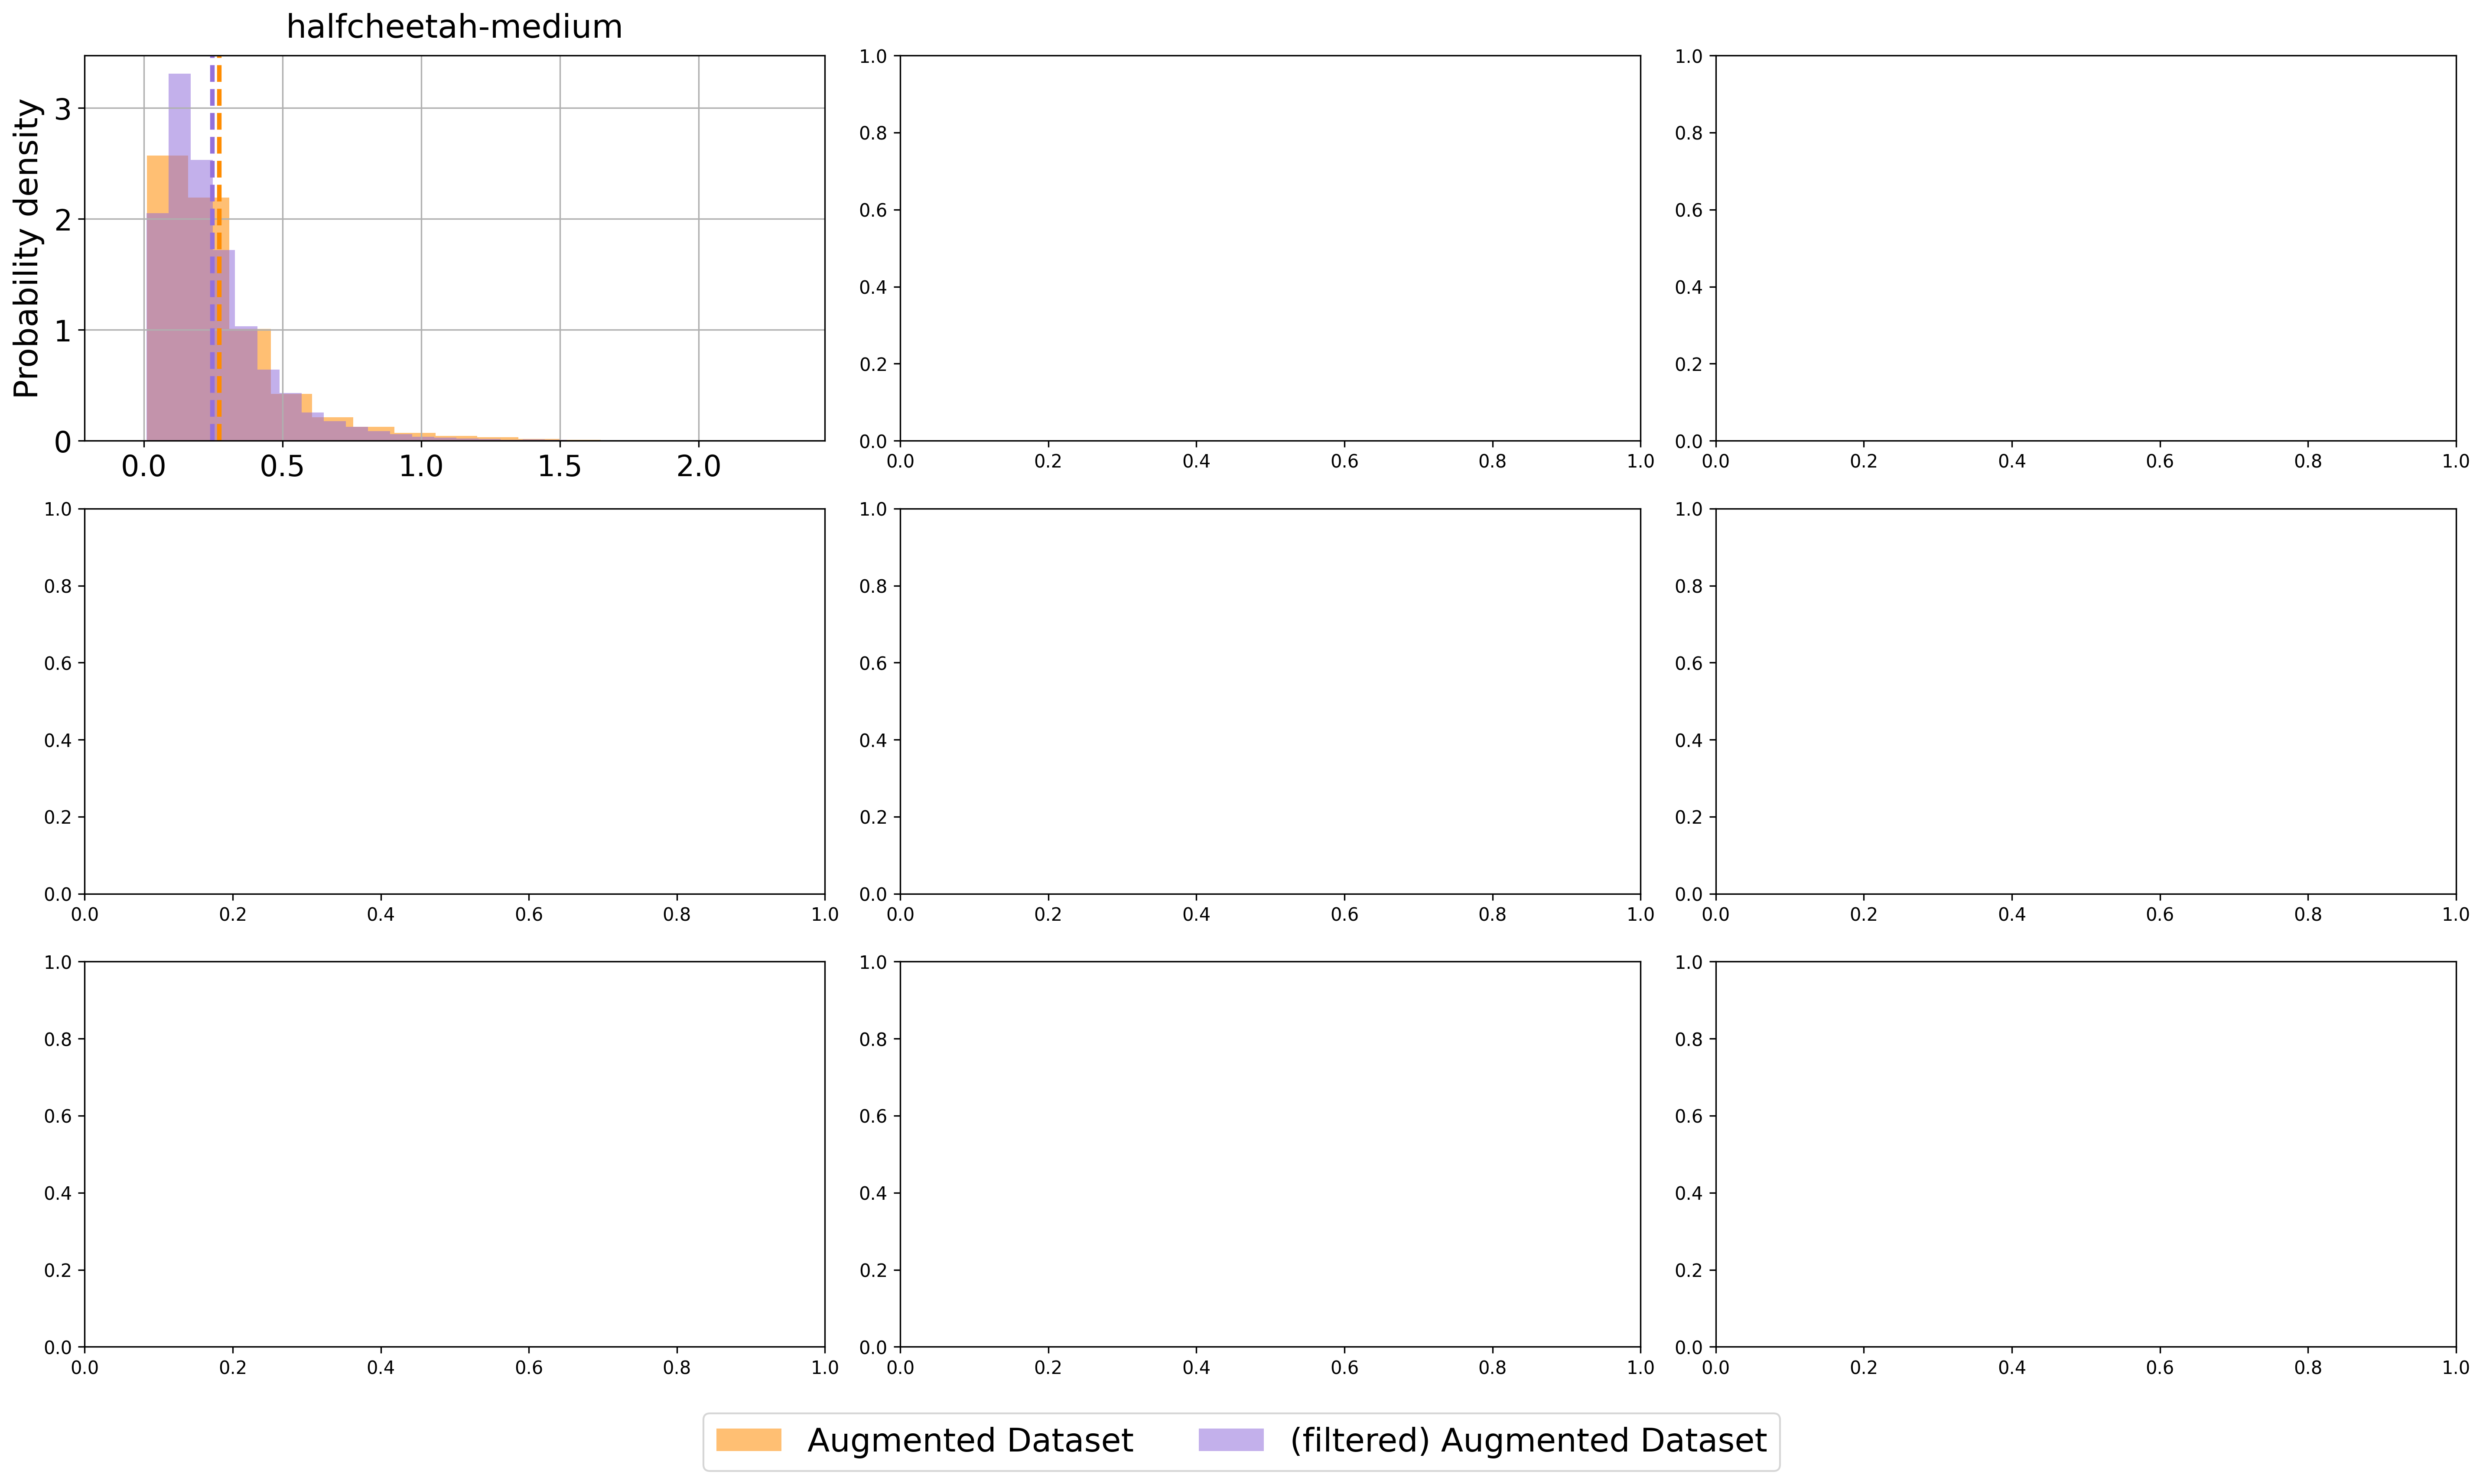

In [5]:
num_bins = 30
labels = ["Augmented Dataset", "(filtered) Augmented Dataset"]
data_types = ["augmented", "filtered"]

colors = ["darkorange", "mediumpurple"]

fig, ax = plt.subplots(3, 3, figsize=(19.2, 10.8), dpi=300)

for i, target_env_name in enumerate(env_names):

    k_list, bins_list, patches_list = [], [], []
    for data_type, label, color in zip(data_types, labels, colors):
        if i == 0:
            k, bins, patches = ax[i//3, i%3].hist(res[f"{target_env_name}_{data_type}"], num_bins, density=True, color=color, alpha=0.55, label=label)
        else:
            k, bins, patches = ax[i//3, i%3].hist(res[f"{target_env_name}_{data_type}"], num_bins, density=True, color=color, alpha=0.55)
        ax[i//3, i%3].axvline(x=res[f"{target_env_name}_{data_type}"].mean(), color=color, linestyle='--', linewidth=2.5)
        k_list.append(k)
        bins_list.append(bins)
        patches_list.append(patches)
        
    cur_xlim = ax[i//3, i%3].get_xlim()
    new_xlim = (cur_xlim[0], (cur_xlim[1] - cur_xlim[0]) / 2)
    ax[i//3, i%3].set_xlim(new_xlim)
    
    if i // 3 == 2:
        ax[i//3, i%3].set_xlabel('Dynamic MSE', fontsize=18)
    if i % 3 == 0:
        ax[i//3, i%3].set_ylabel('Probability density', fontsize=18, labelpad=5)

    legend_labels = labels
    handles = patches_list

    ax[i//3, i%3].grid() 
    ax[i//3, i%3].tick_params(axis="both", labelsize=16)
    ax[i//3, i%3].set_title(target_env_name, pad=10, fontsize=18)
    
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.0), prop={'size':18}, fancybox=True, ncol=2)
plt.tight_layout()
# make directory

make_dir(f"{PATH}/plot/figures/")

plt.savefig(f"{PATH}/plot/figures/dynamic_mse.png", bbox_inches="tight")
plt.show()
plt.close()